In [1]:
import requests
import urllib
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
import time
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, precision_score,\
                            precision_recall_curve, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
def find_numb(k):
    kk = re.findall(r'\d* ?\d*? ?\d*?', k[0])
    kkk = ''
    for i in range(len(kk)):
        for j in kk[i]:
            if j !=' ':
                kkk = kkk + j
    return kkk

def to_normal(html):
    k = re.findall(r'>\d* ?\d* ?\d*<.span>(?:<.a>|<.span>)', html)
    r = re.findall(r'title=.{1,12}"', html)
    if (len(r)<1):
        r= re.findall(r'>.{1,20}подписчик', html)
    p = re.search(r'>\d* ?\d* ?\d*<.span>',html)
    itog=[int(find_numb(r)),int(find_numb(k)),int(find_numb(p))]
    return itog




class Bot:
    def __init__(self,username,password):
        self.options = Options()
        self.options.headless = True
        self.driver = webdriver.Firefox(options=self.options, executable_path=r'C:\Qt\geckodriver.exe')
        self.username=username
        self.password=password
        #self.driver=webdriver.Chrome()#работаем в хроме
    def closeBrow(self):
        self.driver.close()

    def login(self):
        driver=self.driver
        driver.get("https://www.instagram.com/")#открывает заданный сайт
        time.sleep(4)
        login_button=driver.find_element_by_xpath("//a[@href='/accounts/login/?source=auth_switcher']")#ссылка на кнопку залогиниться
        href = "/accounts/login/?source=auth_switcher"
        login_button.click()#тык на кнопку
        time.sleep(4)
        #вводим имя и пароль
        user_name_elem=driver.find_element_by_xpath("//input[@name='username']")
        user_name_elem.clear()
        user_name_elem.send_keys((self.username))

        user_name_pass=driver.find_element_by_xpath("//input[@name='password']")
        user_name_pass.clear()
        user_name_pass.send_keys((self.password))
        user_name_pass.send_keys(Keys.RETURN)
        time.sleep(4)

    def like_photo(self,hashtag):
        driver=self.driver
        driver.get("https://www.instagram.com/explore/tags/" + hashtag+ "/")
        time.sleep(4)
        for i in range(1,3):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(4)

        #ссылки на фоточки
        hrefs=driver.find_elements_by_tag_name('a')
        pic_hrefs=[elem.get_attribute('href') for elem in hrefs]
        #pic_hrefs=[href for href in pic_hrefs if hashtag in href]
        print(hashtag+ ' photos: '+str(len(pic_hrefs)))
        for pic in pic_hrefs:#переходим по ссылочкам и кликаем мне нравится
            driver.get(pic)
            driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
            try:
                # самый универсальный метод поиска: выбираем главный тэг потом пишем параметр внутри него и чему он равен в []
                driver.find_element_by_xpath("//span[@aria-label='Нравится']").click()

                time.sleep(18)
            except Exception as e:
                time.sleep(2)
            print('failure '+ pic)
    def count_subs(self,profile):
        driver=self.driver
        driver.get('https://www.instagram.com/'+profile+'/')
        q=driver.find_element_by_tag_name('ul')
        html=q.get_attribute('innerHTML')
        xpa="//a[@href='/"+profile+"/followers/']"
        driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a').click()
        time.sleep(3)

        fBody = driver.find_element_by_xpath("//div[@class='isgrP']")
        scroll = 0
        
        while scroll < to_normal(html)[1]/4:  # scroll 10 times
            driver.execute_script('arguments[0].scrollTop = arguments[0].scrollTop + arguments[0].offsetHeight;', fBody)
            time.sleep(1)
            scroll += 1
        lll=driver.find_element_by_xpath("/html/body/div[3]/div/div[2]/ul/div")
        test=lll.find_elements_by_tag_name('a')
        link=[i.get_attribute('href') for i in test]

        unique_link=[]
        for i in range(len(link)):
            if link[i] not in unique_link:
                unique_link.append(link[i])

        return(unique_link)
    def desc(self,profile):
        driver=self.driver
        driver.get(profile)
        q=driver.find_element_by_tag_name('ul')
        html=q.get_attribute('innerHTML')

        itog=to_normal(html)
        test = driver.find_element_by_tag_name('h1')
        itog.append(test.text)
        try:
            name=driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/div[2]/h1')
            itog.append(name.text)
        except:
            name=''
            itog.append(name)
        try:
            bio=driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/div[2]/span')
            itog.append(bio.text)
        except:
            bio=''
            itog.append(bio)
        try:
            link=driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/div[2]/a[1]')
            itog.append(link.text)
        except:
            link=''
            itog.append(link)
        return itog

In [3]:
andrew=Bot("andreigolytba","qwe789ty")
andrew.login()


In [4]:
a=andrew.count_subs('k.chaikina')

In [28]:
a[:4]

['https://www.instagram.com/wb.district/',
 'https://www.instagram.com/vsco.xfilter/',
 'https://www.instagram.com/kredit_srochno/',
 'https://www.instagram.com/msk_leninsky/']

In [5]:
e_kut=pd.DataFrame(columns=['Followers','Following','Posts','Username','Name','Bio','Website'])

In [6]:
for i in a:
    e_kut.loc[i]=andrew.desc(i)

In [7]:
len(e_kut)

87

In [8]:
e_kut.head()

,Followers,Following,Posts,Username,Name,Bio,Website
https://www.instagram.com/linaceramica/,6565,4836,288,linaceramica,Керамика ручной работы. СПб,"Сделаю плитку для всего - стол, стена, вешалка...",taplink.cc/linaceramica
https://www.instagram.com/tridvatri123/,1515,2701,0,tridvatri123,,,
https://www.instagram.com/natalu_lux/,3972,6800,579,natalu_lux,Шалыгина Наталья,😍ЕМ И ХУДЕЮ\n😉18 кг минус\n👙расскажу как😜\n😋Де...,taplink.cc/natalu_lux
https://www.instagram.com/matveevagalinavladimirovna/,64,56,2,matveevagalinavladimirovna,Галина Матвеева,,
https://www.instagram.com/imagination_sketching/,48561,4931,163,imagination_sketching,Онлайн-школа рисования №1,Скетчинг акварелью и маркерами 🎨\n⚡️постоянный...,taplink.cc/imagination_sketching/p/10ce44


In [33]:
X_test_ekut=e_kut.drop(columns=['Username','Name','Bio','Website'])

In [46]:
X_test_ekut.head()

,Followers,Following,Posts
https://www.instagram.com/wb.district/,8979,3247,169
https://www.instagram.com/vsco.xfilter/,2009,823,309
https://www.instagram.com/kredit_srochno/,133,4816,10
https://www.instagram.com/msk_leninsky/,9424,4264,1781
https://www.instagram.com/karkas_brus_doma_tomsk/,1181,3876,40


In [290]:
t=clf.predict(X_test_ekut)

ValueError: X has 3 features per sample; expecting 564

In [48]:
plt.plot()

array([[1.00000000e+000, 7.05714038e-112],
       [1.00000000e+000, 5.16592546e-027],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 4.38880684e-124],
       [2.60318391e-006, 9.99997397e-001],
       [8.80495232e-010, 9.99999999e-001],
       [9.99999940e-001, 5.96014595e-008],
       [2.10942375e-014, 1.00000000e+000],
       [5.13098207e-001, 4.86901793e-001],
       [1.00000000e+000, 9.99829240e-028],
       [1.00000000e+000, 3.35909157e-241],
       [7.26058246e-001, 2.73941754e-001],
       [9.99999890e-001, 1.10119074e-007],
       [9.87154572e-001, 1.28454280e-002],
       [1.00000000e+000, 5.01394369e-013],
       [2.60902446e-003, 9.97390976e-001],
       [9.99966036e-001, 3.39638704e-005],
       [4.96789440e-001, 5.03210560e-001],
       [9.99999447e-001, 5.52520946e-007],
       [9.99828339e-001, 1.71660508e-004],
       [8.50026450e-001, 1.49973550e-001],
       [1.00000000e+000, 3.83280710e-036],
       [9.41533742e-001, 5.84662583e-002],
       [1.0

In [9]:
ins=pd.read_excel('instagram.xlsx',header=None)
ins=ins.rename(columns={0:'Url'})

In [10]:
df=pd.DataFrame(columns=['Followers','Following','Posts','Username','Name','Bio','Website'])

In [11]:
for i in range(len(ins['Url'])):
    df.loc[i]=andrew.desc(ins['Url'][i])

In [22]:
df.head()

,Followers,Following,Posts,Username,Name,Bio,Website
0,282,170,86,kutuzova_evgeniya,Evgeniya Kutuzova,,vk.com/id86680924
1,146,314,28,sample_to_imitate,Александр,,vk.com/seryakov98
2,3962,1056,58,konovash_tattoo,✨TATTOO MOSCOW✨,Татулировщица🐼 #konovashtattoo\nNika Konovash🦄...,vk.com/id148902401
3,118081,75,140,blog.bones,♉☠▪Павлова х🔥йни не скажет▪☠♉,💀▪Лунапарк с блэкджеком и шл😈хами\n💀▪Мой парен...,
4,21484,5815,572,strap_for_you,"НИЖНЕЕ БЕЛЬЁ, ВЫДЕЛЯЙСЯ😉❣️",🙌🏼Одеваем 🍑 всея Инстаграм\n.\n💕 Брэнд нескучн...,api.whatsapp.com/send?phone=79307092990


In [99]:
tokens=[]
for i in df['Bio']:
    tokens.append(i.lower().split())

In [100]:
df['Bio']=tokens

In [72]:
tokens1=[]
for i in df['Name']:
    tokens1.append(i.lower().split())

In [73]:
df['Name']=tokens

In [19]:
ins.head()

,Url
0,https://www.instagram.com/kutuzova_evgeniya/
1,https://www.instagram.com/sample_to_imitate/
2,https://www.instagram.com/konovash_tattoo/
3,https://www.instagram.com/blog.bones/
4,https://www.instagram.com/strap_for_you/


In [23]:
df['Target']=0

In [103]:
df.head()

,Followers,Following,Posts,Username,Name,Bio,Website,Target
0,281,170,86,kutuzova_evgeniya,Evgeniya Kutuzova,[],vk.com/id86680924,0
1,146,314,28,sample_to_imitate,Александр,[],vk.com/seryakov98,0
2,3962,1174,58,konovash_tattoo,✨TATTOO MOSCOW✨,"[татулировщица🐼, #konovashtattoo, nika, konova...",vk.com/id148902401,0
3,118293,75,140,blog.bones,♉☠▪Павлова х🔥йни не скажет▪☠♉,"[💀▪лунапарк, с, блэкджеком, и, шл😈хами, 💀▪мой,...",,0
4,21497,5813,571,strap_for_you,"НИЖНЕЕ БЕЛЬЁ, ВЫДЕЛЯЙСЯ😉❣️","[🙌🏼одеваем, 🍑, всея, инстаграм, ., 💕, брэнд, н...",api.whatsapp.com/send?phone=79307092990,0


In [24]:
df=df.copy()
df.iloc[80:]['Target']=1

D:\q1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
df_new=df

In [27]:
df_new.tail()

,Followers,Following,Posts,Username,Name,Bio,Website,Target
95,25,829,1,apple_watch.analog,Знакомые будут в восторге!,📱 Смартфон на твоей руке\n👌 Стильный дизайн\n💯...,goo.gl/E7MQ4P,1
96,481,2450,8,k_assya48785,Ася,❗ Aкция!!\n⏳ Успeй зaказать чaсы Miсhael Кors ...,goo.gl/LRoQhc,1
97,5057,6319,21,like_support_moscow,🛃ВОЕННЫЙ БИЛЕТ 💯% ЛЕГАЛЬНО,Пиши в директ прямо сейчас и узнай как легальн...,,1
98,2126,5400,24,prodvigenie_iin2,▪️Продвижение Инстаграм,Работаем официально\n⠀\nПриводим клиентов\n🔴от...,prodvigenie1.plp7.ru,1
99,137,4816,10,kredit_srochno,кредит онлайн,Взять кредит с плохой кредитной историей и про...,vk.com/club182128387,1


In [107]:
texts_tokenized = [' '.join([w for w in t ]) for t in df['Bio']]

In [149]:
df_new=df_new.copy()
for i in range(len(df_new['Bio'])):
    df_new['Bio'][i]=texts_tokenized[i]

D:\q1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [150]:
df_new.head()

,Followers,Following,Posts,Username,Name,Bio,Website,Target
0,281,170,86,kutuzova_evgeniya,Evgeniya Kutuzova,,vk.com/id86680924,0
1,146,314,28,sample_to_imitate,Александр,,vk.com/seryakov98,0
2,3962,1174,58,konovash_tattoo,✨TATTOO MOSCOW✨,татулировщица🐼 #konovashtattoo nika konovash🦄 ...,vk.com/id148902401,0
3,118293,75,140,blog.bones,♉☠▪Павлова х🔥йни не скажет▪☠♉,💀▪лунапарк с блэкджеком и шл😈хами 💀▪мой парень...,,0
4,21497,5813,571,strap_for_you,"НИЖНЕЕ БЕЛЬЁ, ВЫДЕЛЯЙСЯ😉❣️",🙌🏼одеваем 🍑 всея инстаграм . 💕 брэнд нескучног...,api.whatsapp.com/send?phone=79307092990,0


In [29]:
df_test=df_new

In [30]:
df_test=df_test.copy()
df_test['Website'][df_test['Website']!='']=1
df_test['Website'][df_test['Website']=='']=0

D:\q1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\q1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
df_new=df_test

In [32]:
X=df_new.drop(columns='Target')
y=df_new['Target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=43,stratify=y)

In [34]:
X_train.shape,X_test.shape,y_train.shape

((70, 7), (30, 7), (70,))

In [35]:
tfidf_vec = TfidfVectorizer()

In [36]:
X_train_tfidf1 = tfidf_vec.fit_transform(X_train['Bio'])
X_test_tfidf1 = tfidf_vec.transform(X_test['Bio'])

In [37]:
X_train_tfidf1

<70x561 sparse matrix of type '<class 'numpy.float64'>'
	with 647 stored elements in Compressed Sparse Row format>

In [38]:
X_train_after_all=pd.concat([X_train.drop(columns=['Bio','Name','Username']).reset_index(drop=True),pd.DataFrame(X_train_tfidf1.todense())],axis=1)

In [39]:
X_test_after_all=pd.concat([X_test.drop(columns=['Bio','Name','Username']).reset_index(drop=True),pd.DataFrame(X_test_tfidf1.todense())],axis=1)

In [40]:
X_test_after_all.head()

,Followers,Following,Posts,Website,0,1,2,3,4,5,...,551,552,553,554,555,556,557,558,559,560
0,46263,316,2051,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,399,664,279,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,239,5320,49,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,320,356,237,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,244,99,324,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
clf1 = LogisticRegression(random_state=3)

In [42]:
p24=clf1.fit(X_train_after_all,y_train)

In [255]:
X_test_after_all.shape

(30, 565)

In [256]:
X_train_after_all.shape

(70, 565)

In [43]:
p24_score=accuracy_score(y_test,p24.predict(X_test_after_all))
p24_score

0.9

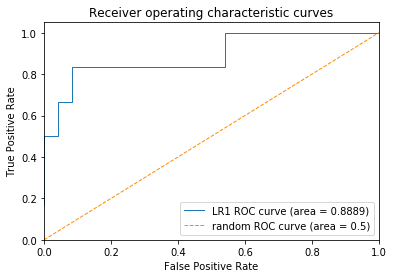

In [44]:
def generate_metrics(prediction):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, prediction[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc
lr_pred1 = clf1.predict_proba(X_test_after_all)
lr1_fpr, lr1_tpr, lr1_roc_auc = generate_metrics(lr_pred1)
plt.plot(lr1_fpr[1], lr1_tpr[1], lw=1, label='LR1 ROC curve (area = %0.4f)' % lr1_roc_auc[1])
plt.plot([0, 1], [0, 1], lw=1, color='darkorange', linestyle='--', label='random ROC curve (area = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves')
plt.legend(loc='best')
plt.show()



In [278]:
matr=confusion_matrix(y_test,clf1.predict(X_test_after_all))


[]

In [286]:
conf_matrix = pd.DataFrame(matr,index=['Actual_Person','Actual_Bot'],columns=['Predicted_Person','Predicted_Bot'])

In [287]:
conf_matrix

,Predicted_Person,Predicted_Bot
Actual_Person,23,1
Actual_Bot,2,4


In [45]:
e_kut_new=e_kut

In [46]:
def pre_processing(df):
    df_test=df.copy()
    df_test['Website'][df_test['Website']!='']=1
    df_test['Website'][df_test['Website']=='']=0
    df_test_tfidf1 = tfidf_vec.fit_transform(df_test['Bio'])
    df_test_after_all=pd.concat([df_test.drop(columns=['Bio','Name','Username']).reset_index(drop=True),
                                 pd.DataFrame(df_test_tfidf1.todense())],axis=1)
    return(df_test_after_all)

In [47]:
pre_e_kut_new=pre_processing(e_kut_new)

In [48]:
pre_e_kut_new.head()

,Followers,Following,Posts,Website,0,1,2,3,4,5,...,667,668,669,670,671,672,673,674,675,676
0,6565,4836,288,1,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1515,2701,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3972,6800,579,1,0.225569,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,64,56,2,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48561,4931,163,1,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
zhopa=pre_e_kut_new.iloc[:,:565]

In [53]:
itog=pd.concat([e_kut,pd.DataFrame(p24.predict(zhopa)).set_index(e_kut.index)],axis=1)

In [54]:
itog=itog.rename(columns={0:'Prediction'})

In [331]:
e_kut['Username'].head()

https://www.instagram.com/wb.district/                          wb.district
https://www.instagram.com/vsco.xfilter/                        vsco.xfilter
https://www.instagram.com/kredit_srochno/                    kredit_srochno
https://www.instagram.com/msk_leninsky/                        msk_leninsky
https://www.instagram.com/karkas_brus_doma_tomsk/    karkas_brus_doma_tomsk
Name: Username, dtype: object

In [55]:
itog.head()

,Followers,Following,Posts,Username,Name,Bio,Website,Prediction
https://www.instagram.com/linaceramica/,6565,4836,288,linaceramica,Керамика ручной работы. СПб,"Сделаю плитку для всего - стол, стена, вешалка...",taplink.cc/linaceramica,0
https://www.instagram.com/tridvatri123/,1515,2701,0,tridvatri123,,,,0
https://www.instagram.com/natalu_lux/,3972,6800,579,natalu_lux,Шалыгина Наталья,😍ЕМ И ХУДЕЮ\n😉18 кг минус\n👙расскажу как😜\n😋Де...,taplink.cc/natalu_lux,0
https://www.instagram.com/matveevagalinavladimirovna/,64,56,2,matveevagalinavladimirovna,Галина Матвеева,,,0
https://www.instagram.com/imagination_sketching/,48561,4931,163,imagination_sketching,Онлайн-школа рисования №1,Скетчинг акварелью и маркерами 🎨\n⚡️постоянный...,taplink.cc/imagination_sketching/p/10ce44,0


     feature    importance
1  Following  1.357911e-02
4    Website -5.884126e-12
3        Bio -6.468395e-05
2      Posts -1.687742e-02
0  Followers -3.307116e-02


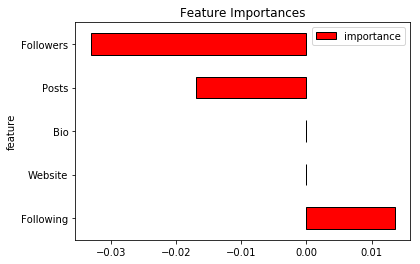

In [369]:
def show_feature_importances(model, features):
    results = pd.DataFrame({'feature': features, 'importance': model.coef_[0][:5]})
    results = results.sort_values('importance', ascending = False)
    print(results.head(10))
    results.head(25).plot(x = 'feature', y = 'importance', kind = 'barh',
                     color = 'red', edgecolor = 'k', title = 'Feature Importances');
    return results

feature_importances = show_feature_importances(clf1, ['Followers', 'Following', 'Posts', 'Bio','Website'])

In [56]:
itog['Prediction'].value_counts()

0    52
1    35
Name: Prediction, dtype: int64

In [57]:
itog[itog.Prediction == 1].iloc[:,:4].head(10)

,Followers,Following,Posts,Username
https://www.instagram.com/lilshy541/,821,6596,21,lilshy541
https://www.instagram.com/vall_pavlyk/,1332,5723,1671,vall_pavlyk
https://www.instagram.com/tamara_659_1/,76,3693,0,tamara_659_1
https://www.instagram.com/bogodenchik/,57,175,2,bogodenchik
https://www.instagram.com/tatianakrashina/,371,7489,9,tatianakrashina
https://www.instagram.com/mikhaylov_architect/,978,3584,75,mikhaylov_architect
https://www.instagram.com/thr333nil/,34,95,7,thr333nil
https://www.instagram.com/alinka_velichko_22/,479,6834,0,alinka_velichko_22
https://www.instagram.com/francais_avec_polina/,1156,4559,87,francais_avec_polina
https://www.instagram.com/tymosulek/,150,873,35,tymosulek
